In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


In [2]:
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
import seaborn as sns

In [3]:
# load the dataset
df= pd.read_csv('../input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')
print("The dataset has %d rows and %d columns." % df.shape)

The dataset has 1470 rows and 35 columns.


Lets Check Missing values

In [4]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

Target variables

In [5]:
df.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)

In [6]:
df['Attrition'].value_counts(normalize=True)

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

Target variable is imbalanced. We can try to use sampling to fix this but we will do this later.

In [7]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


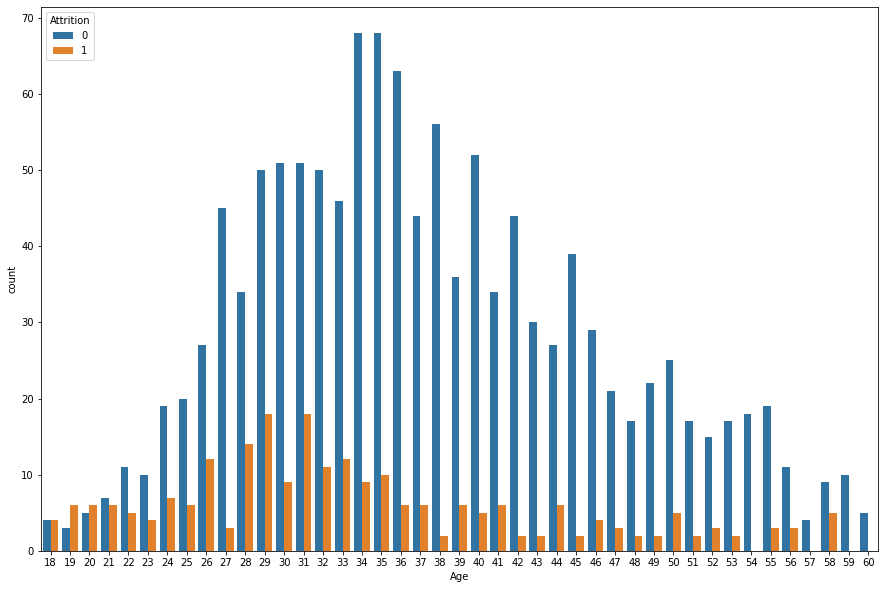

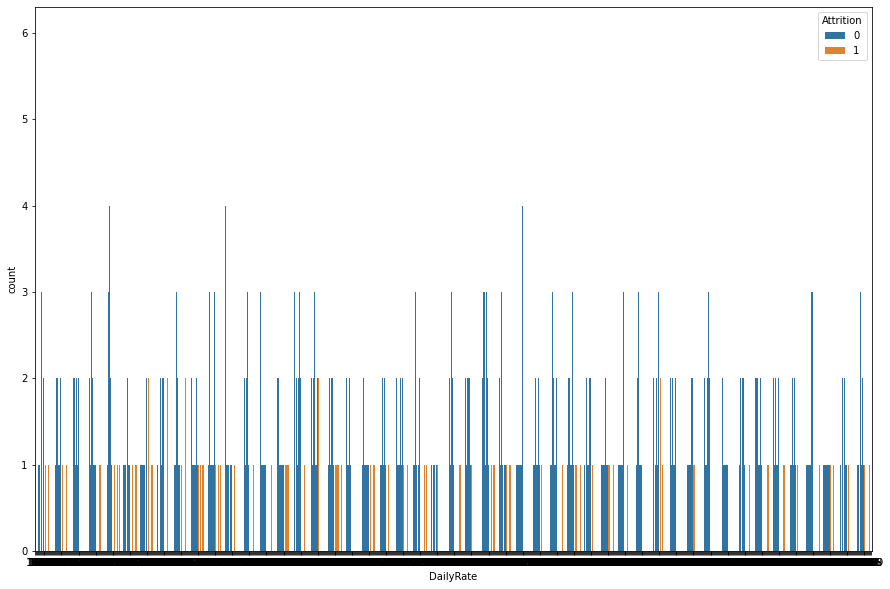

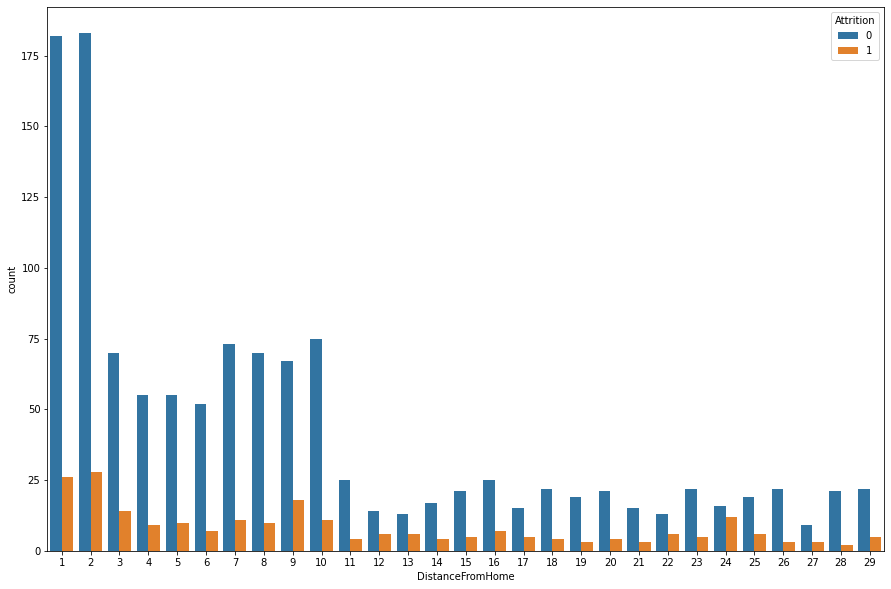

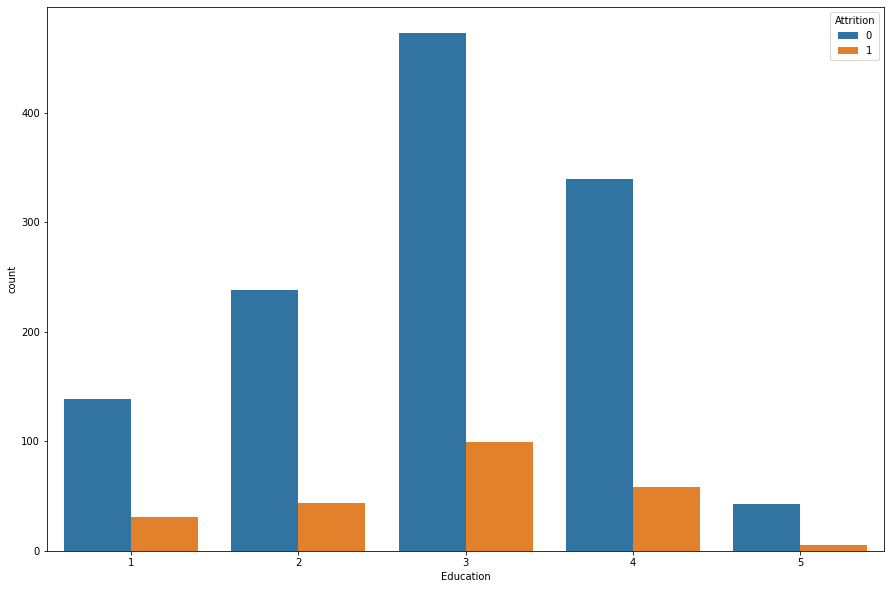

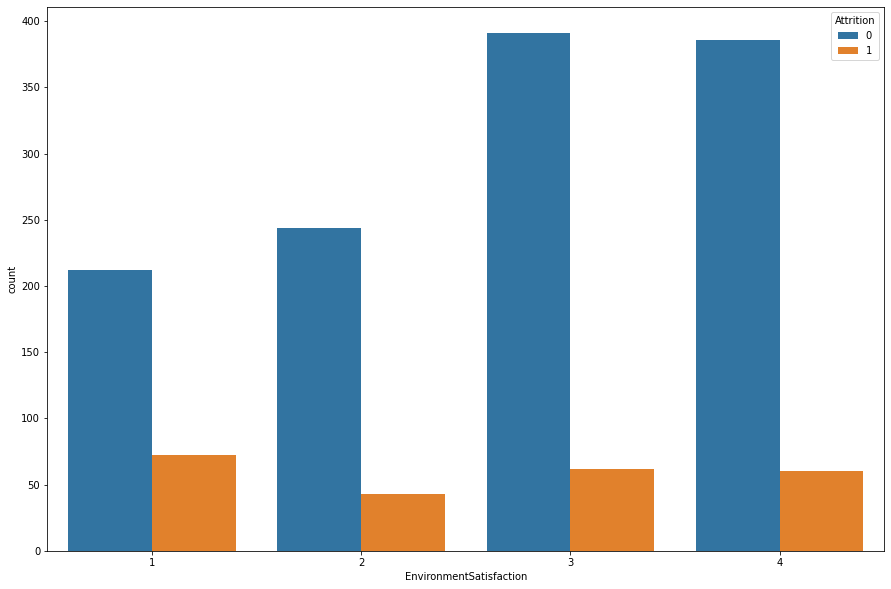

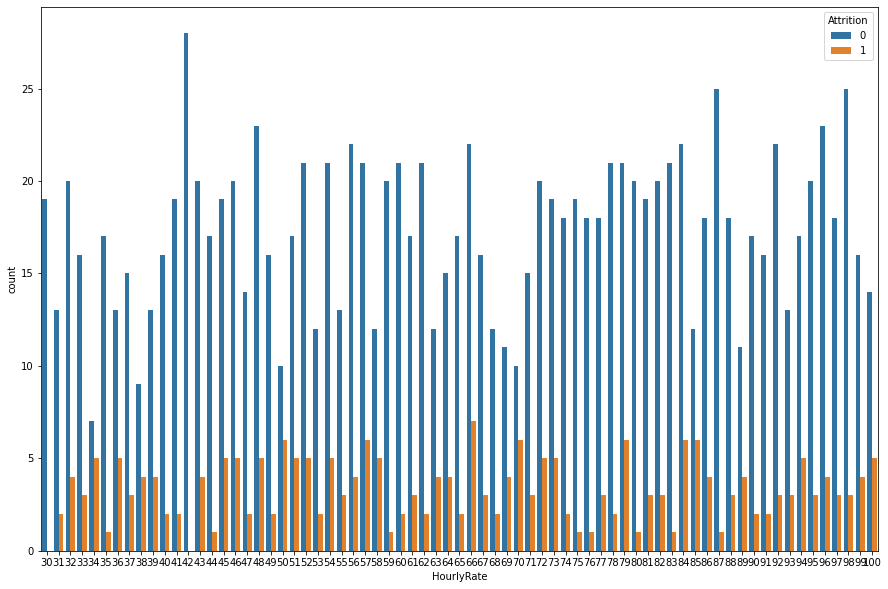

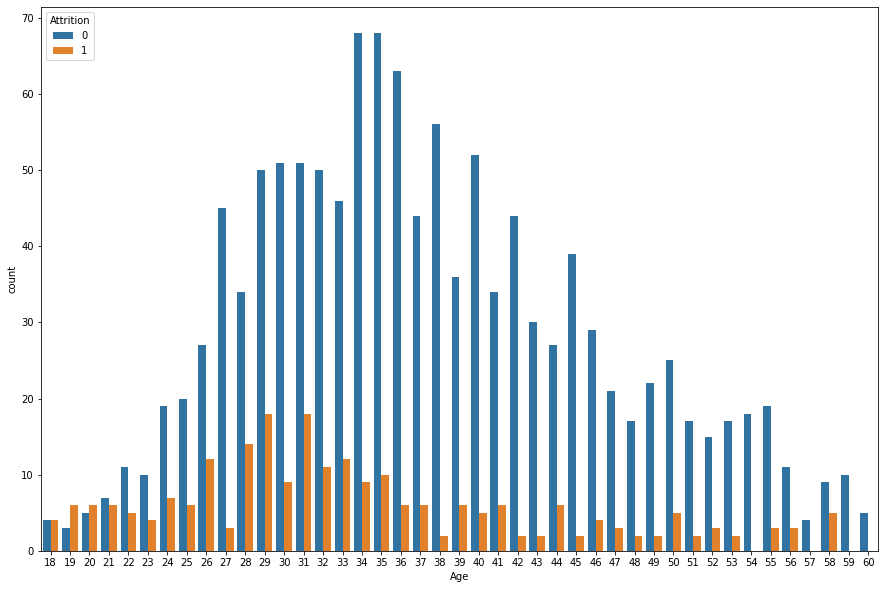

In [9]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,10))
sns.countplot(df['Age'], hue=df['Attrition'])
fig, (axis1) = plt.subplots(1,1,figsize=(15,10))
sns.countplot(df['DailyRate'], hue=df['Attrition'])
fig, (axis1) = plt.subplots(1,1,figsize=(15,10))
sns.countplot(df['DistanceFromHome'], hue=df['Attrition'])
fig, (axis1) = plt.subplots(1,1,figsize=(15,10))
sns.countplot(df['Education'], hue=df['Attrition'])
fig, (axis1) = plt.subplots(1,1,figsize=(15,10))
sns.countplot(df['EnvironmentSatisfaction'], hue=df['Attrition'])
fig, (axis1) = plt.subplots(1,1,figsize=(15,10))
sns.countplot(df['HourlyRate'], hue=df['Attrition'])
fig, (axis1) = plt.subplots(1,1,figsize=(15,10))
sns.countplot(df['Age'], hue=df['Attrition'])

In [10]:
print("------  Data Types  ----- \n",df.dtypes)

------  Data Types  ----- 
 Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel           

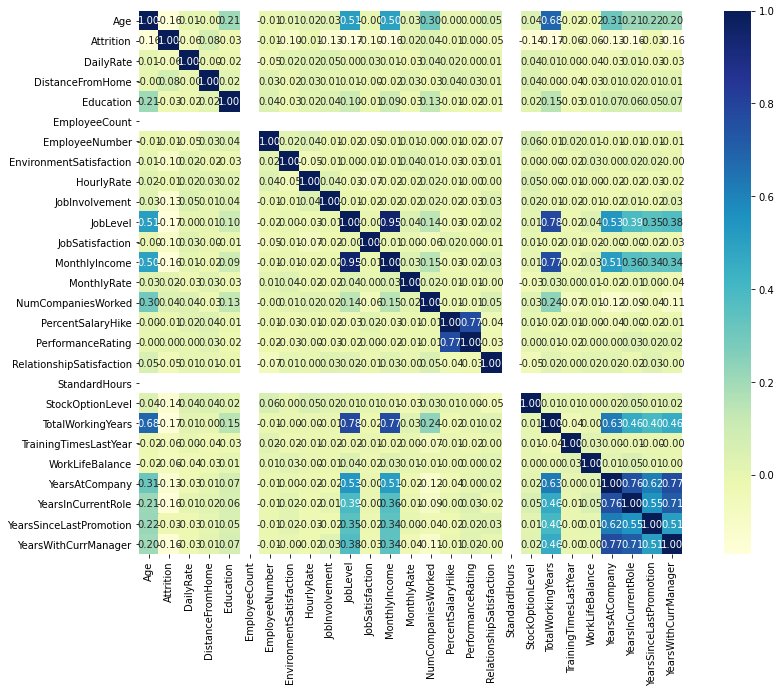

In [11]:
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},cmap='YlGnBu')

In [12]:
#Lets drop few variables which doesnt look helpful
df = df.drop(['EmployeeCount','EmployeeNumber'], axis=1)

One hot encoding to fix the variables.

In [13]:
dataset =  df.drop(['OverTime','MaritalStatus','JobRole','Gender','Department','EducationField','BusinessTravel','Over18'], axis=1)
BusinessTravel = pd.get_dummies(df.BusinessTravel).iloc[:,1:]
Department = pd.get_dummies(df.Department).iloc[:,1:]
OverTime = pd.get_dummies(df.OverTime).iloc[:,1:]
MaritalStatus = pd.get_dummies(df.MaritalStatus).iloc[:,1:]
JobRole = pd.get_dummies(df.JobRole).iloc[:,1:]
Gender = pd.get_dummies(df.Gender).iloc[:,1:]
EducationField = pd.get_dummies(df.EducationField).iloc[:,1:]
Over18 = pd.get_dummies(df.Over18).iloc[:,1:]
dataset = pd.concat([dataset,Over18,BusinessTravel,Department,OverTime,MaritalStatus,JobRole,Gender,], axis=1)
dataset

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,Single,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Male
0,41,1,1102,1,2,2,94,3,2,4,...,1,0,0,0,0,0,0,1,0,0
1,49,0,279,8,1,3,61,2,2,2,...,0,0,0,0,0,0,1,0,0,1
2,37,1,1373,2,2,4,92,2,1,3,...,1,0,1,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,56,3,1,3,...,0,0,0,0,0,0,1,0,0,0
4,27,0,591,2,1,1,40,3,1,2,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,41,4,2,4,...,0,0,1,0,0,0,0,0,0,1
1466,39,0,613,6,1,4,42,2,3,1,...,0,0,0,0,0,0,0,0,0,1
1467,27,0,155,4,3,2,87,4,2,2,...,0,0,0,0,1,0,0,0,0,1
1468,49,0,1023,2,3,4,63,2,2,2,...,0,0,0,0,0,0,0,1,0,1


In [14]:
print("------  Data Types  ----- \n",dataset.dtypes)

------  Data Types  ----- 
 Age                         int64
Attrition                   int64
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
EnvironmentSatisfaction     int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
Travel_Frequently           uint8
Travel_Rarely               uint8
Research & Development      uint8
Sales               

In [15]:
X =  dataset.drop(['Attrition'], axis=1)
y = dataset['Attrition']

RANDOM Forest Model

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10,random_state=1)
from sklearn.ensemble import RandomForestClassifier

In [17]:
classifier =  RandomForestClassifier(n_estimators = 400,random_state = 42)
classifier.fit(X_train, y_train)  
predictions = classifier.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,predictions ))  
print(accuracy_score(y_test, predictions ))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88       116
           1       0.60      0.10      0.17        31

    accuracy                           0.80       147
   macro avg       0.70      0.54      0.53       147
weighted avg       0.76      0.80      0.73       147

0.7959183673469388


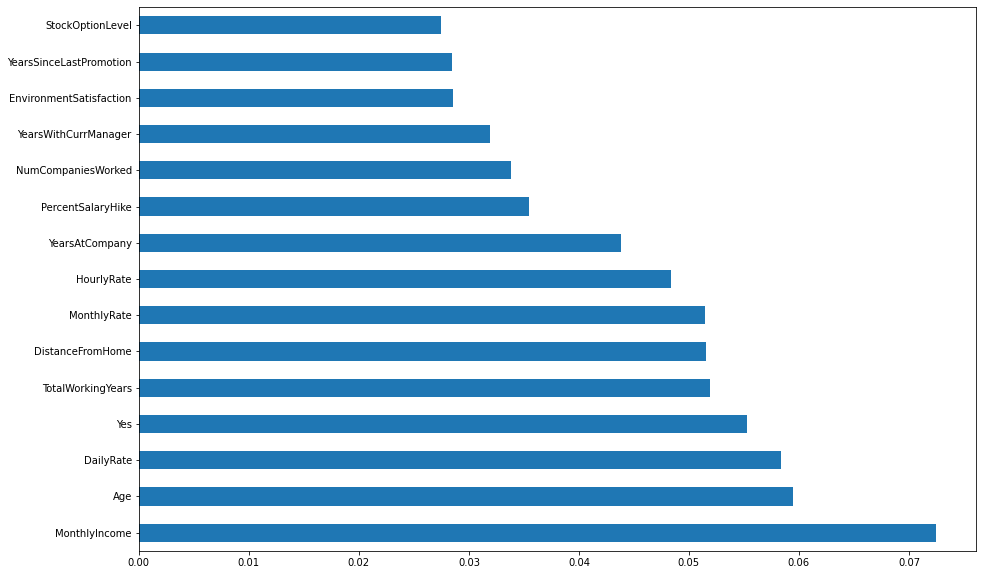

In [18]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,10))
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

XGBOOST Model

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 70% training and 30% test

In [20]:
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)
print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))

Accuracy of XGB classifier on training set: 0.99
Accuracy of XGB classifier on test set: 0.87


In [21]:
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       255
           1       0.50      0.23      0.32        39

    accuracy                           0.87       294
   macro avg       0.70      0.60      0.62       294
weighted avg       0.84      0.87      0.85       294



Gradient Boosting

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)  # 80% training and 20% test

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)#Import scikit-learn metrics module for accuracy calculation

In [24]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8707482993197279
Precision: 0.84375
Recall: 0.34177215189873417


Lets Compare all the models we build

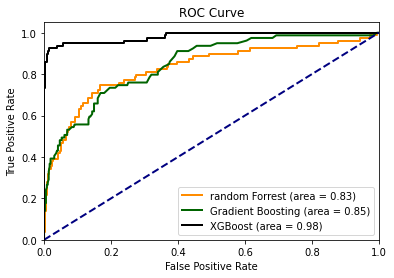

In [25]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

classifier.fit(X_train, y_train)

rf_predict_probabilities = classifier.predict_proba(X_test)[:,1]
gb_predict_probabilities = gb.predict_proba(X_test)[:,1]
y_predict_xgb = xgb_model.predict_proba(X_test)[:,1]


gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_predict_probabilities)
gb_roc_auc = auc(gb_fpr, gb_tpr)

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_predict_probabilities)
rf_roc_auc = auc(rf_fpr, rf_tpr)

xgb_fpr, xgb_tpr, _ = roc_curve(y_test, y_predict_xgb)
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)


plt.figure()
plt.plot(gb_fpr, gb_tpr, color='darkorange',
         lw=2, label='random Forrest (area = %0.2f)' % gb_roc_auc)
plt.plot(rf_fpr, rf_tpr, color='darkgreen',
         lw=2, label='Gradient Boosting (area = %0.2f)' % rf_roc_auc)
plt.plot(xgb_fpr, xgb_tpr, color='black',
         lw=2, label='XGBoost (area = %0.2f)' % xgb_roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [26]:
pred_for_submission = xgb_model.predict(X_test).astype(int)
pred_for_submission

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [27]:
xgb_probs = xgb_model.predict_proba(X_test)
xgb_probs

array([[0.9825344 , 0.01746558],
       [0.98045474, 0.01954524],
       [0.18636465, 0.81363535],
       [0.10030669, 0.8996933 ],
       [0.92617387, 0.07382616],
       [0.96681565, 0.03318434],
       [0.9122995 , 0.08770048],
       [0.9803653 , 0.01963472],
       [0.96895623, 0.03104377],
       [0.9840972 , 0.0159028 ],
       [0.1588549 , 0.8411451 ],
       [0.9546788 , 0.04532123],
       [0.98131776, 0.01868221],
       [0.9826115 , 0.0173885 ],
       [0.9857146 , 0.01428536],
       [0.9866652 , 0.01333481],
       [0.9592234 , 0.04077661],
       [0.9627232 , 0.03727682],
       [0.9887578 , 0.01124222],
       [0.50053906, 0.49946094],
       [0.95019644, 0.04980356],
       [0.98979235, 0.01020767],
       [0.9804838 , 0.01951626],
       [0.9376012 , 0.06239878],
       [0.9693524 , 0.03064759],
       [0.96742284, 0.03257718],
       [0.09596747, 0.9040325 ],
       [0.30273616, 0.69726384],
       [0.9669027 , 0.03309735],
       [0.93681383, 0.06318615],
       [0.